In [ ]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import anndata
from scipy.stats import spearmanr, pearsonr
import numpy as np
from PIL import Image
import matplotlib

from digitalhistopathology.clustering.clustering_utils import plot_ari_scores_all_patients
import warnings

# Suppress all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [46]:
# Load configuration
with open("../config/config_notebooks.json", "r") as config_file:
    config = json.load(config_file)

a = config["base_color_palette"]
sns.set_palette(a)
base_model_palette = config["base_model_palette"]

base_model_list = config["base_model_list"]
benchmark_folder = config["base_benchmark_folder"]

## Create Figure2 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure2")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure2"))

## Create Figure3 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure3")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure3"))

## Create Figure4 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure4")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure4"))
    
## Create Figure5 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure5")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure5"))

## Comparison between linear and unlinear clustering

In [47]:
with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'unsupervised_clustering_results_optk.json')) as f:
    raw_clust = json.load(f)
    
with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
    svd_clust = json.load(f)
 
with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'best_umap_ari_per_slide.json')) as f:
    umap_clust = json.load(f)



In [48]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari all: {raw_clust[model]['all']['ari']}, ari mean: {raw_clust[model]['mean']['ari']}")

Model: uni: ari all: 0.1405392782347744, ari mean: 0.2351268295263375
Model: uni2: ari all: 0.18521218744767412, ari mean: 0.2679689887382149
Model: virchow: ari all: 0.1183085728713925, ari mean: 0.17190180596666965
Model: provgigapath: ari all: 0.17792105308917527, ari mean: 0.21482550933591596
Model: ctranspath: ari all: 0.13713016500660263, ari mean: 0.19542486389103267
Model: simclr: ari all: 0.12163234853750751, ari mean: 0.1942217274165287
Model: handcrafted_features: ari all: 0.10094446204343024, ari mean: 0.11174721697791898


In [49]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari tumor: {raw_clust[model]['ARI_tumor']}")

Model: uni: ari tumor: 0.14775572194802
Model: uni2: ari tumor: 0.1864012080313909
Model: virchow: ari tumor: 0.10255900228781585
Model: provgigapath: ari tumor: 0.15293057564211432
Model: ctranspath: ari tumor: 0.13812792738857277
Model: simclr: ari tumor: 0.1309163343846592
Model: handcrafted_features: ari tumor: 0.08584559722543653


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


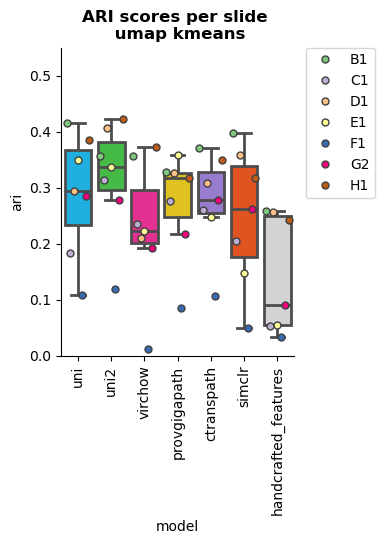

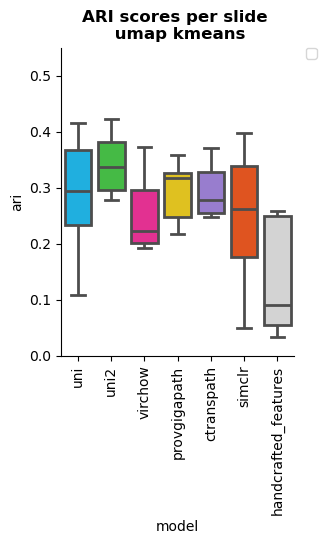

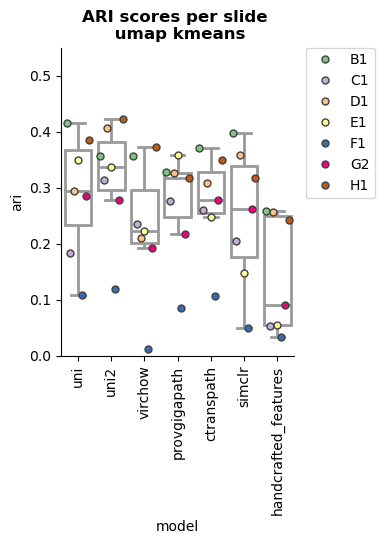

In [50]:
# for clust_dict, clust_name in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):

plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), color_boxes=True)
plt.ylim(0, 0.55)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_with_patient.pdf"), bbox_inches='tight')


plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=False, color_boxes=True)
plt.ylim(0, 0.55)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_without_patient.pdf"), bbox_inches='tight')

plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=True, color_boxes=False)
plt.ylim(0, 0.55)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_no_color_with_patient.pdf"), bbox_inches='tight')

In [51]:
# Scatter plot

In [52]:
dfs_clust = []
for clustering_dict, method in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):
#for clustering_dict, method in zip([umap_clust], ["umap"]):
    ari_scores = {}
    for model in clustering_dict.keys():
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            if patient != "ARI_tumor":
            #if (patient != 'all') and (patient != 'mean'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)
    df_aris_melted['clustering'] = method
    dfs_clust.append(df_aris_melted)

df_comp = pd.concat(dfs_clust)




In [53]:
df_comp

,model,ari,patient,clustering
0,uni,0.303135,B1,raw
1,uni,0.161330,C1,raw
2,uni,0.309677,D1,raw
3,uni,0.204250,E1,raw
4,uni,0.064554,F1,raw
...,...,...,...,...
44,handcrafted_features,0.255941,D1,umap
45,handcrafted_features,0.054999,E1,umap
46,handcrafted_features,0.033992,F1,umap
47,handcrafted_features,0.090632,G2,umap


In [54]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()

,ari
model,
ctranspath,0.188948
handcrafted_features,0.110547
provgigapath,0.210725
simclr,0.186156
uni,0.224617
uni2,0.258774
virchow,0.165947


In [55]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').std()

,ari
model,
ctranspath,0.091898
handcrafted_features,0.087322
provgigapath,0.093010
simclr,0.108977
uni,0.094085
uni2,0.105284
virchow,0.104048


In [56]:
## Correlation with shannon entropy
import json 
with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")) as f:
    shannon_entropy = json.load(f)
    


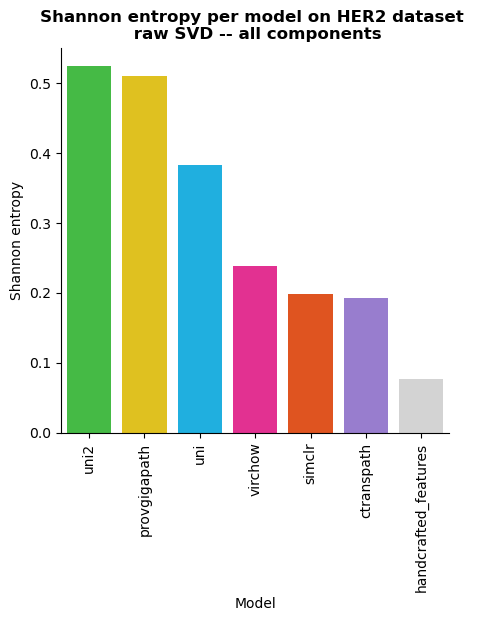

In [57]:

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

df_shannon.sort_values('shannon_entropy', inplace=True, ascending=False)
sns.barplot(data=df_shannon, 
            x=df_shannon.index, 
            y='shannon_entropy', 
            hue=df_shannon.index, palette=base_model_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Shannon entropy")
plt.title(f"Shannon entropy per model on HER2 dataset \n raw SVD -- all components", weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy.pdf"), bbox_inches='tight')

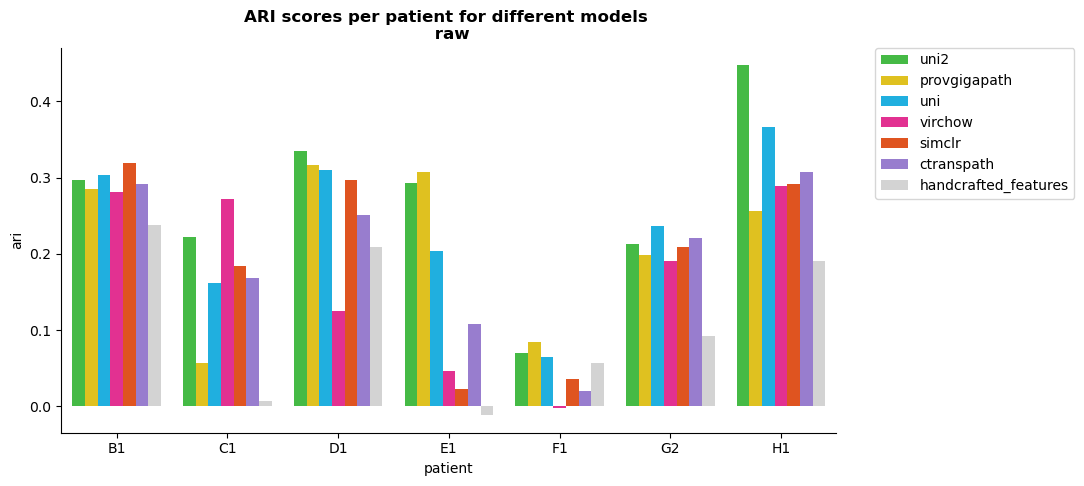

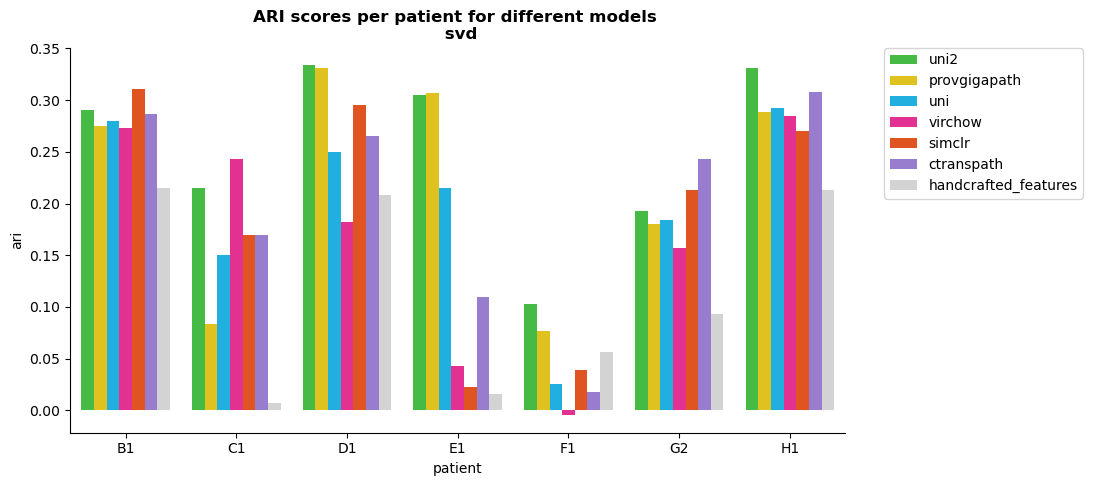

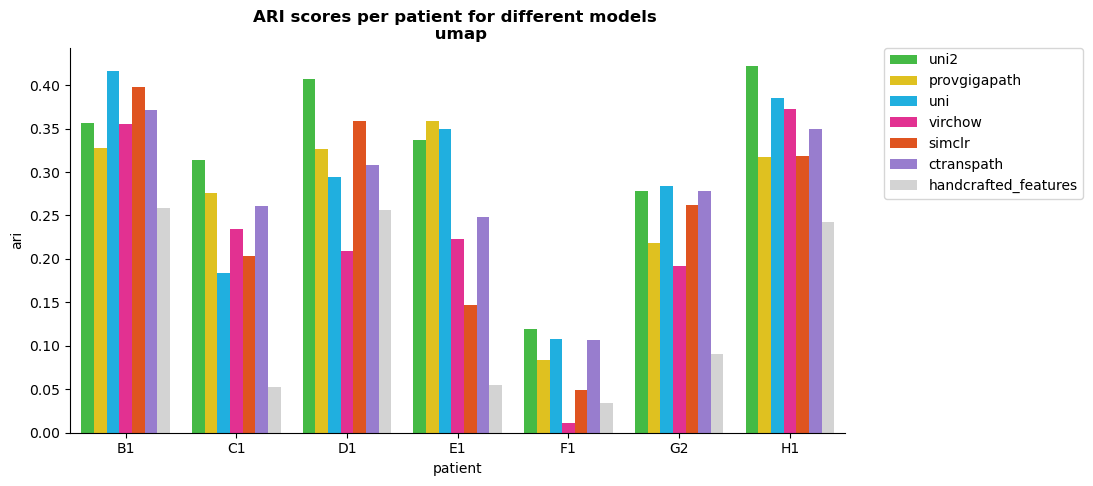

In [58]:
## ARI scores in the same order

for method in ["raw", "svd", "umap"]:
    ordered_dfs = []

    for model in df_shannon.index:
        ordered_dfs.append(df_comp[(df_comp['model'] == model) & (df_comp["clustering"] == method) & (df_comp['patient'] != 'all') & (df_comp['patient'] != 'mean')])

    df_comp_method = pd.concat(ordered_dfs)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_comp_method, x='patient', y='ari', hue='model', palette=base_model_palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title(f'ARI scores per patient for different models \n {method}', weight='bold')

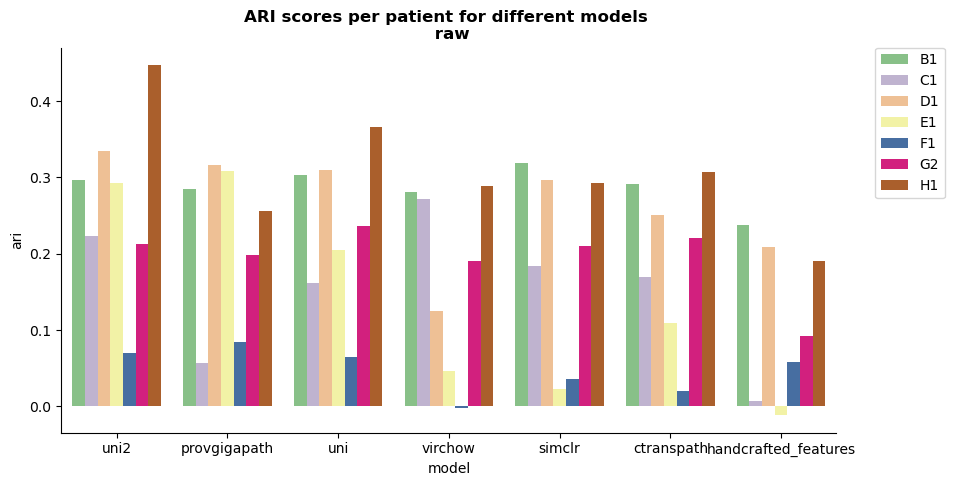

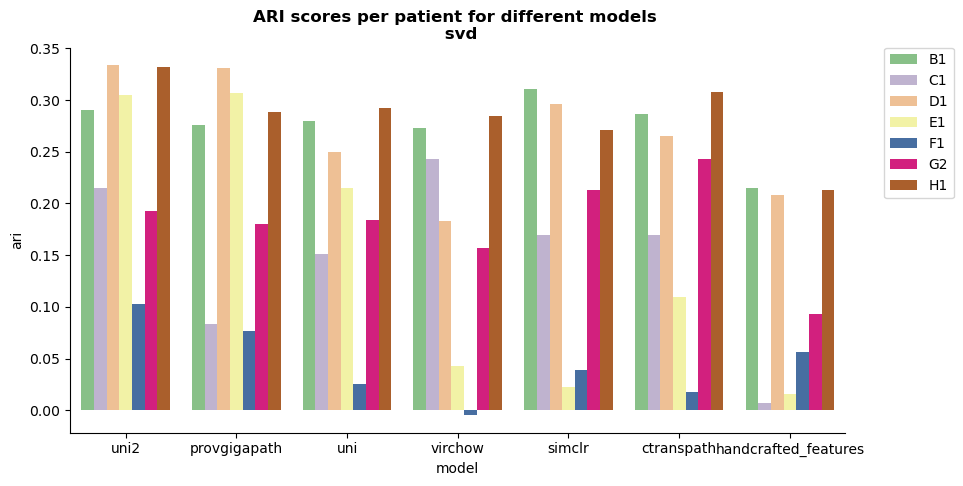

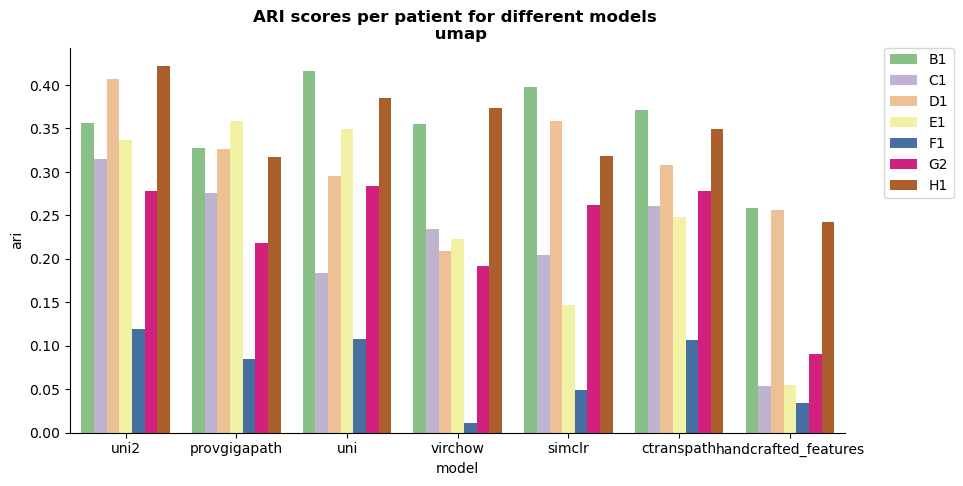

In [59]:
## ARI scores in the same order

for method in ["raw", "svd", "umap"]:
    ordered_dfs = []

    for model in df_shannon.index:
        ordered_dfs.append(df_comp[(df_comp['model'] == model) & (df_comp["clustering"] == method) & (df_comp['patient'] != 'all') & (df_comp['patient'] != 'mean')])

    df_comp_method = pd.concat(ordered_dfs)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_comp_method, x='model', y='ari', hue='patient', palette="Accent")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title(f'ARI scores per patient for different models \n {method}', weight='bold')

In [60]:
import math
def make_spider(df, row, color, title):
    
    categories=list(df)[0:]
    N = len(categories)

    
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(5, 5))
 
    ax = plt.subplot(1,1,1, polar=True)
 
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
    
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12)
    ax.tick_params(axis='x', rotation=5.5)
    
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.2,0.3,0.4], ["0.1","0.2","0.3","0.4"], color="black", size=10)
    plt.ylim(0,0.55)
 
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.1)
 
  
    plt.title(title, fontsize=20, x = 0.5, y = 1.1)
    

In [61]:
df_comp_patient = df_comp[df_comp["patient"].isin(["A1", "B1", "C1", "D1", "E1", "F1", "G2", "H1"])]


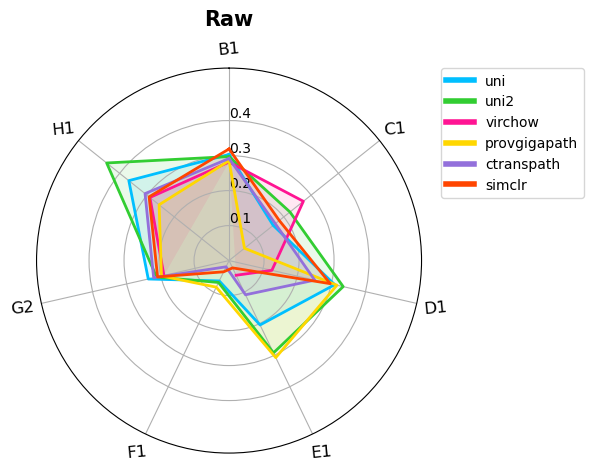

In [62]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "raw")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("Raw", weight='bold', y=1.09, fontsize=15)

handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_raw.pdf"), bbox_inches='tight')

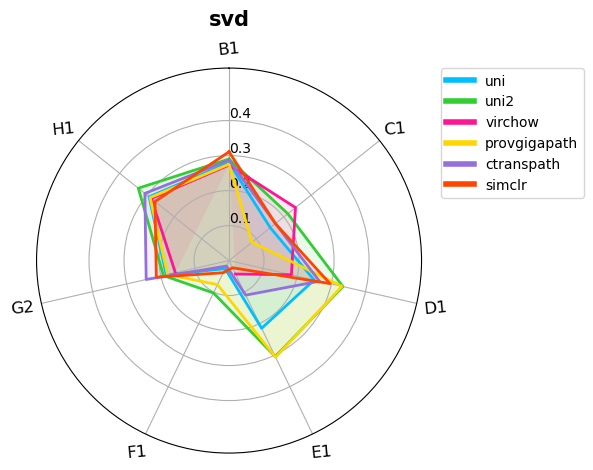

In [63]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "svd")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("svd", weight='bold', y=1.09, fontsize=15)
    
handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_svd.pdf"), bbox_inches='tight')

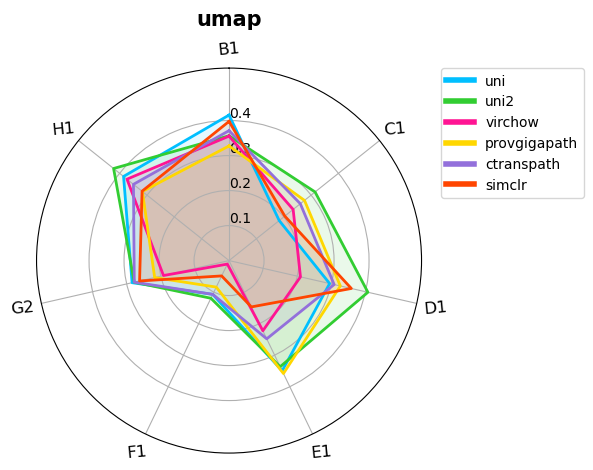

In [64]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "umap")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("umap", weight='bold', y=1.09, fontsize=15)
handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_umap.pdf"), bbox_inches='tight')

In [65]:
ari_raw = pd.DataFrame.from_dict({model: {patient: raw_clust[model][patient]['ari'] for patient in raw_clust[model].keys() if patient not in ["ARI_tumor"]} for model in raw_clust.keys()})
df_raw_overall = pd.DataFrame(ari_raw.loc["all"])
df_raw_overall.columns = ['ari']

In [66]:
ari_svd = pd.DataFrame.from_dict({model: {patient: svd_clust[model][patient]['ari'] for patient in svd_clust[model].keys()} for model in svd_clust.keys()})
df_svd_overall = pd.DataFrame(ari_svd.loc["all"])
df_svd_overall.columns = ['ari']

In [67]:


with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', f'best_umap_ari_overall.json')) as f:
    ari_umap_overall = json.load(f)
    
df_umap_overall = pd.DataFrame(ari_umap_overall).T[['ari']]


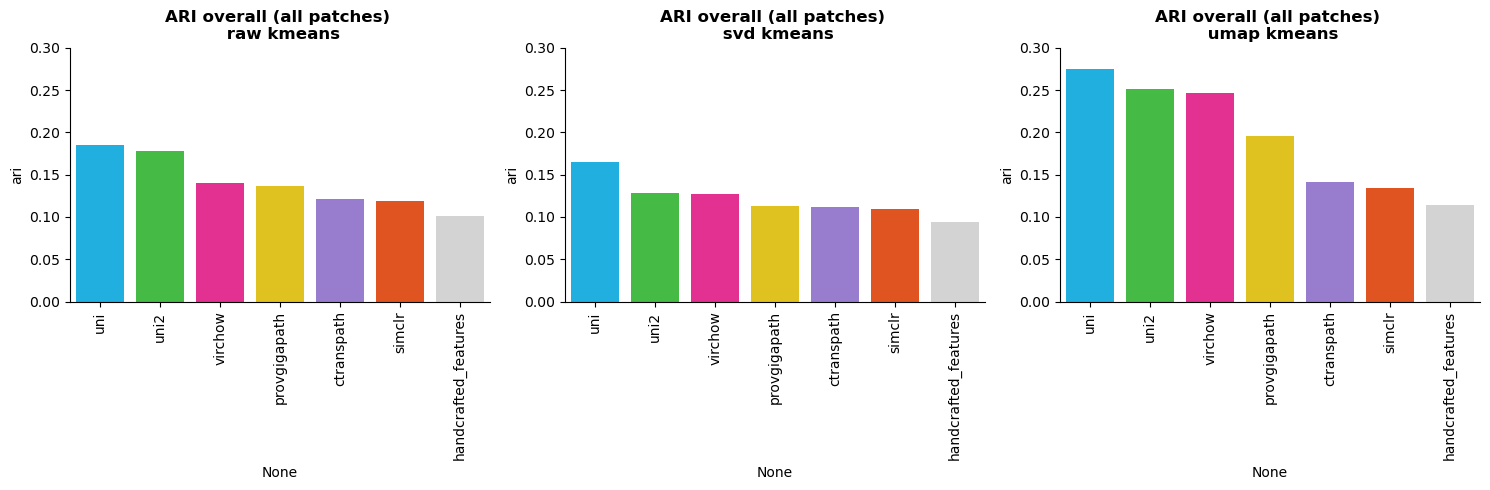

In [68]:
plt.figure(figsize=(15, 5))

names = ["raw kmeans", "svd kmeans", "umap kmeans"]

for i, df_ari_overall in enumerate([df_raw_overall, df_svd_overall, df_umap_overall]):
    plt.subplot(1, 3, 1 + i)
    sns.barplot(data=df_ari_overall.sort_values("ari", ascending=False), x=df_ari_overall.index, y="ari", hue=df_ari_overall.index, palette=base_model_palette)
    plt.xticks(rotation=90)
    sns.despine()
    plt.tight_layout()
    plt.ylim(0, 0.3)
    plt.title(f"ARI overall (all patches) \n {names[i]}", weight='bold')


plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_raw_svd_umap_barplot.pdf"), bbox_inches='tight')



## Correlation ARI and shannon entropy

In [69]:
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

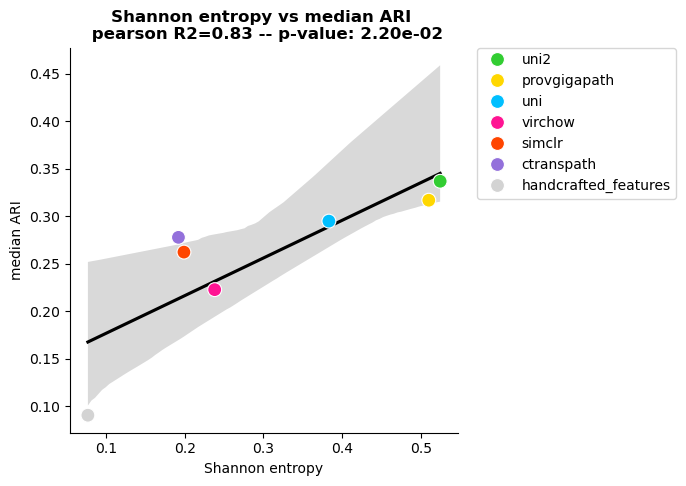

In [70]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
median_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').median()
median_ari_per_model.columns = ['median_ari']
df_model_summary = df_shannon.merge(median_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['median_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='median_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='median_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('median ARI')
plt.title(f'Shannon entropy vs median ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_median_ari.pdf"), bbox_inches='tight')

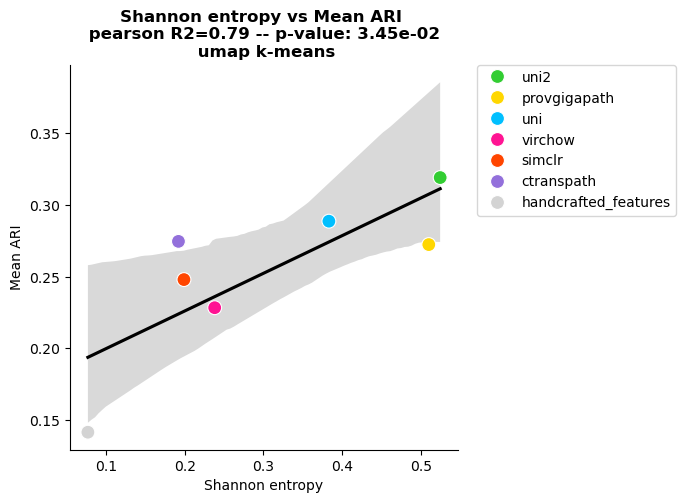

In [71]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n umap k-means', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_umapkmeans.pdf"), bbox_inches='tight')

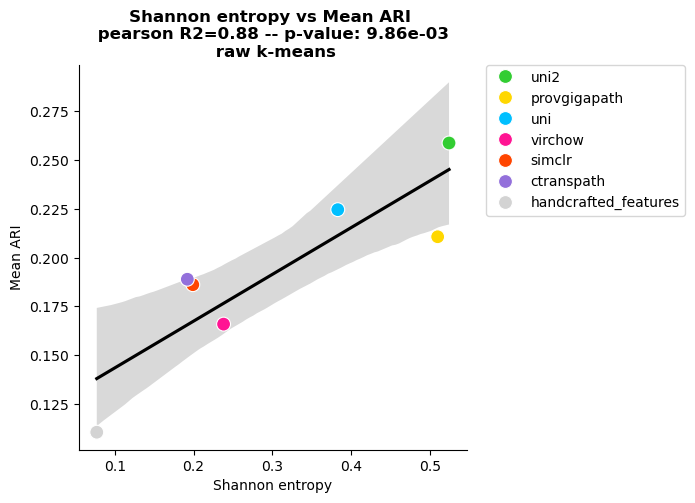

In [72]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n raw k-means', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_rawkmeans.pdf"), bbox_inches='tight')

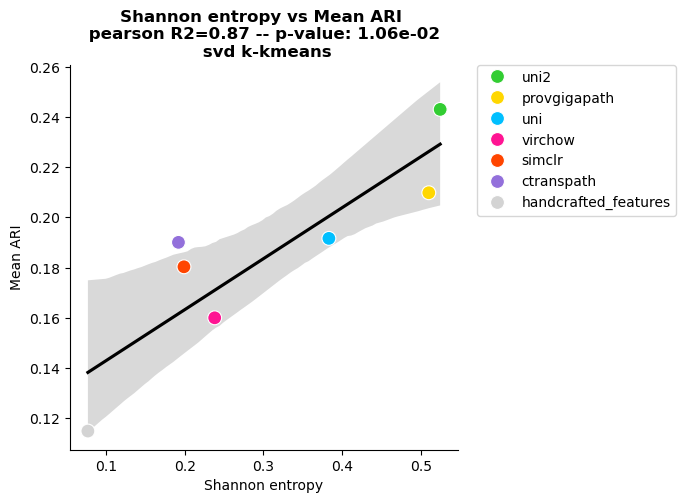

In [73]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'svd'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n svd k-kmeans', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_svdkmeans.pdf"), bbox_inches='tight')

In [74]:
with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', f"best_umap_ari_overall_annotated_only.json")) as f:
    overall_umap = json.load(f)

overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

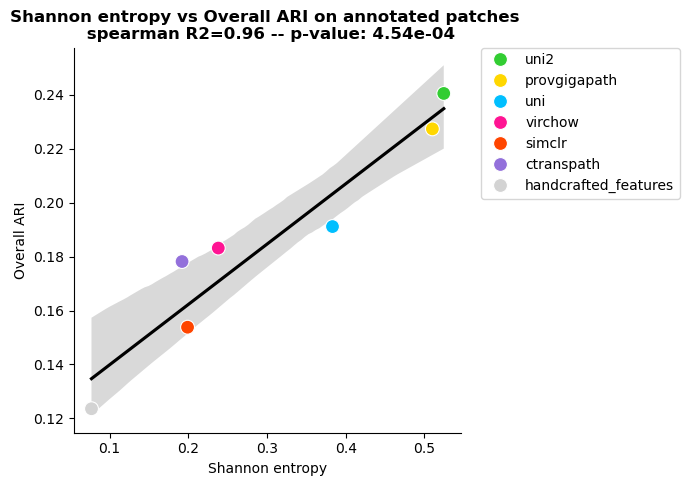

In [75]:
s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on annotated patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari_annotated_only.pdf"), bbox_inches='tight')

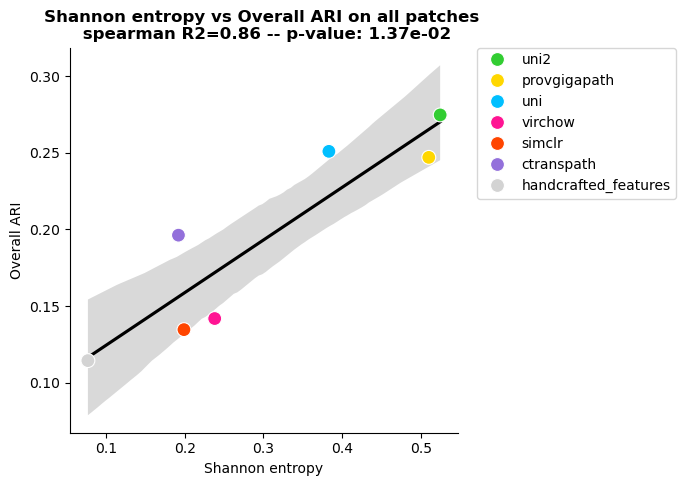

In [76]:
with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', f"best_umap_ari_overall.json")) as f:
    overall_umap = json.load(f)

overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on all patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari.pdf"), bbox_inches='tight')

In [77]:
df_model_summary

,shannon_entropy,mean_ari,overall_ari
uni2,0.524574,0.242994,0.274677
provgigapath,0.510116,0.209816,0.246975
uni,0.383174,0.191646,0.250911
virchow,0.238045,0.160020,0.141818
simclr,0.198963,0.180331,0.134581
ctranspath,0.191989,0.190064,0.196212
handcrafted_features,0.076902,0.114933,0.114369


In [78]:
df_model_summary2 = df_comp.merge(df_shannon, left_on='model', right_index=True, how='left')
df_model_summary2

,model,ari,patient,clustering,shannon_entropy
0,uni,0.303135,B1,raw,0.383174
1,uni,0.161330,C1,raw,0.383174
2,uni,0.309677,D1,raw,0.383174
3,uni,0.204250,E1,raw,0.383174
4,uni,0.064554,F1,raw,0.383174
...,...,...,...,...,...
44,handcrafted_features,0.255941,D1,umap,0.076902
45,handcrafted_features,0.054999,E1,umap,0.076902
46,handcrafted_features,0.033992,F1,umap,0.076902
47,handcrafted_features,0.090632,G2,umap,0.076902


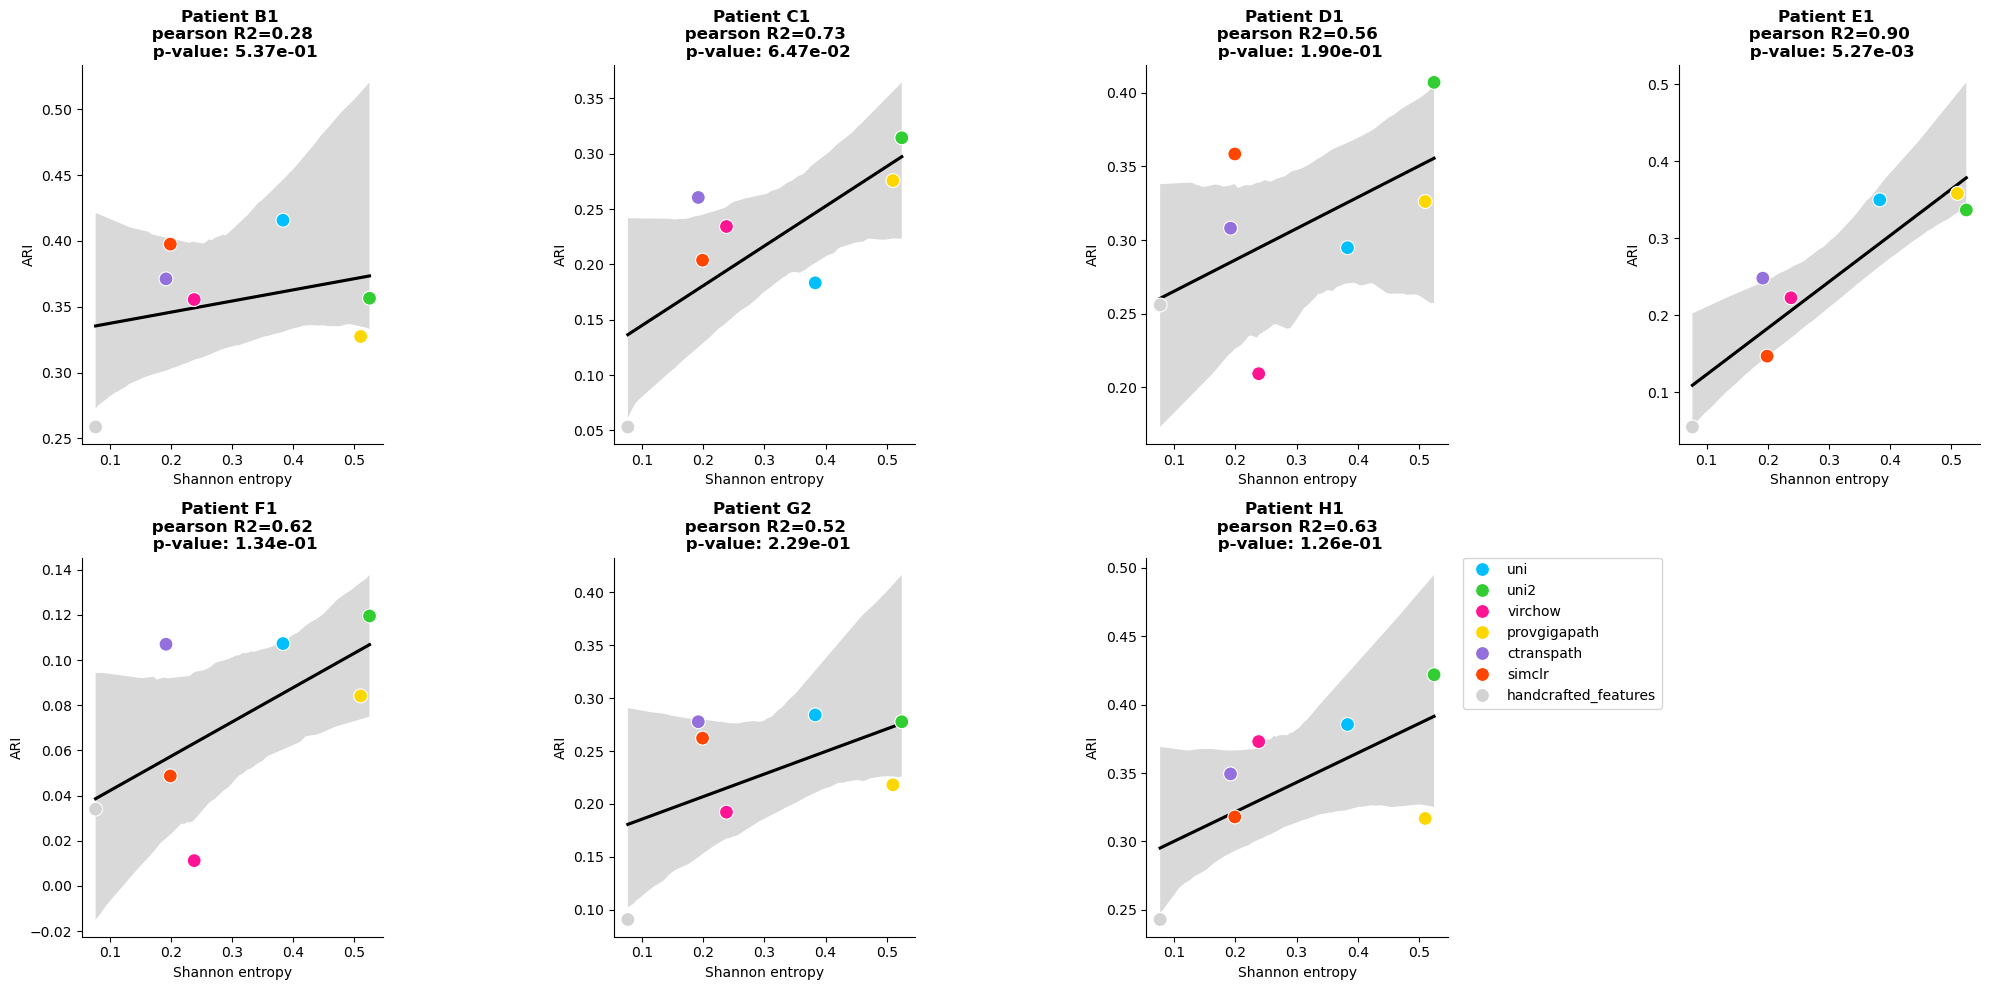

In [79]:
## Shannon vs ARI per patient


df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon, left_on='model', right_index=True, how='left')

plt.figure(figsize=(20, 10))
for i, patient in enumerate(df_model_summary2['patient'].unique()):
    sub_df = df_model_summary2[df_model_summary2['patient'] == patient]

    s, p = pearsonr(sub_df['shannon_entropy'], sub_df['ari'])
    plt.subplot(2, 4, i+1)
    sns.regplot(data=sub_df, x='shannon_entropy', y='ari', color='black')
    sns.scatterplot(data=sub_df, x='shannon_entropy', y='ari', hue=sub_df['model'],
                    palette=base_model_palette, s=100, zorder=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Shannon entropy')
    plt.ylabel('ARI')
    plt.title(f'Patient {patient} \n pearson R2={s:.2f} \n p-value: {p:.2e}', weight='bold')
    sns.despine()

    if i != 6:
        plt.legend().remove()
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig(os.path.join(config['figures_folder'], "Figure2/overall_shannon_vs_ari_per_patient.pdf"), bbox_inches='tight')
    


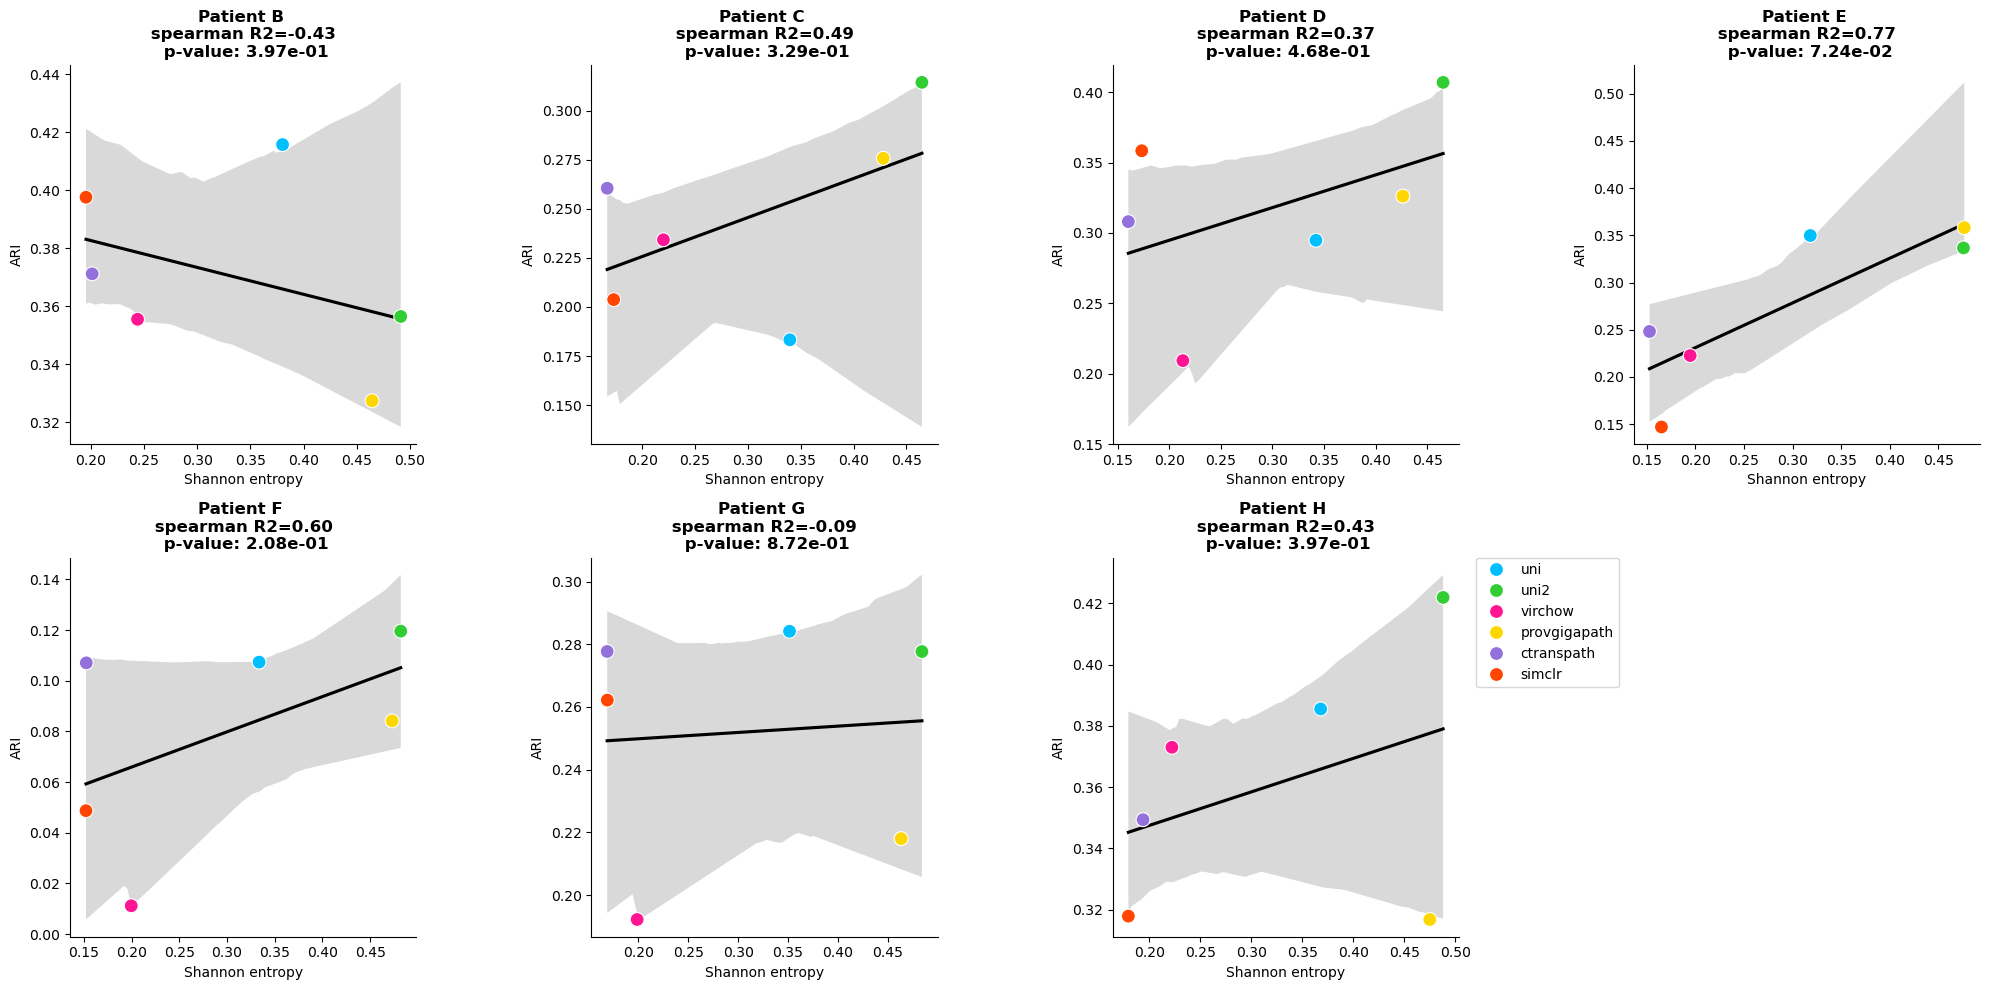

In [80]:
with open(os.path.join(config['base_benchmark_folder'], "shannon_entropy", "shannon_entropy_per_group_all_comps_raw.json")) as f:
    shannon_per_patient = json.load(f)
df_shannon_per_patient = pd.DataFrame.from_dict(shannon_per_patient, orient='index')
df_shannon_per_patient

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient, left_on='patient', right_index=True, how='left')

df_shannon_per_patient_melted = pd.melt(df_shannon_per_patient, var_name='patient', value_name='shannon_entropy_per_patient')
df_shannon_per_patient_melted['model'] = list(df_shannon_per_patient.index) * len(df_shannon_per_patient.columns)

df_comp['patient'] = df_comp['patient'].apply(lambda x: x[0])

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient_melted, on=['patient', 'model'])

plt.figure(figsize=(20, 10))
for i, patient in enumerate(df_model_summary2['patient'].unique()):
    sub_df = df_model_summary2[df_model_summary2['patient'] == patient]

    s, p = spearmanr(sub_df['shannon_entropy_per_patient'], sub_df['ari'])
    plt.subplot(2, 4, i+1)
    sns.regplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', color='black')
    sns.scatterplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', hue=sub_df['model'],
                    palette=base_model_palette, s=100, zorder=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Shannon entropy')
    plt.ylabel('ARI')
    plt.title(f'Patient {patient} \n spearman R2={s:.2f} \n p-value: {p:.2e}', weight='bold')
    sns.despine()

    if i != 6:
        plt.legend().remove()
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_per_patient_vs_ari_per_patient.pdf"), bbox_inches='tight')


    

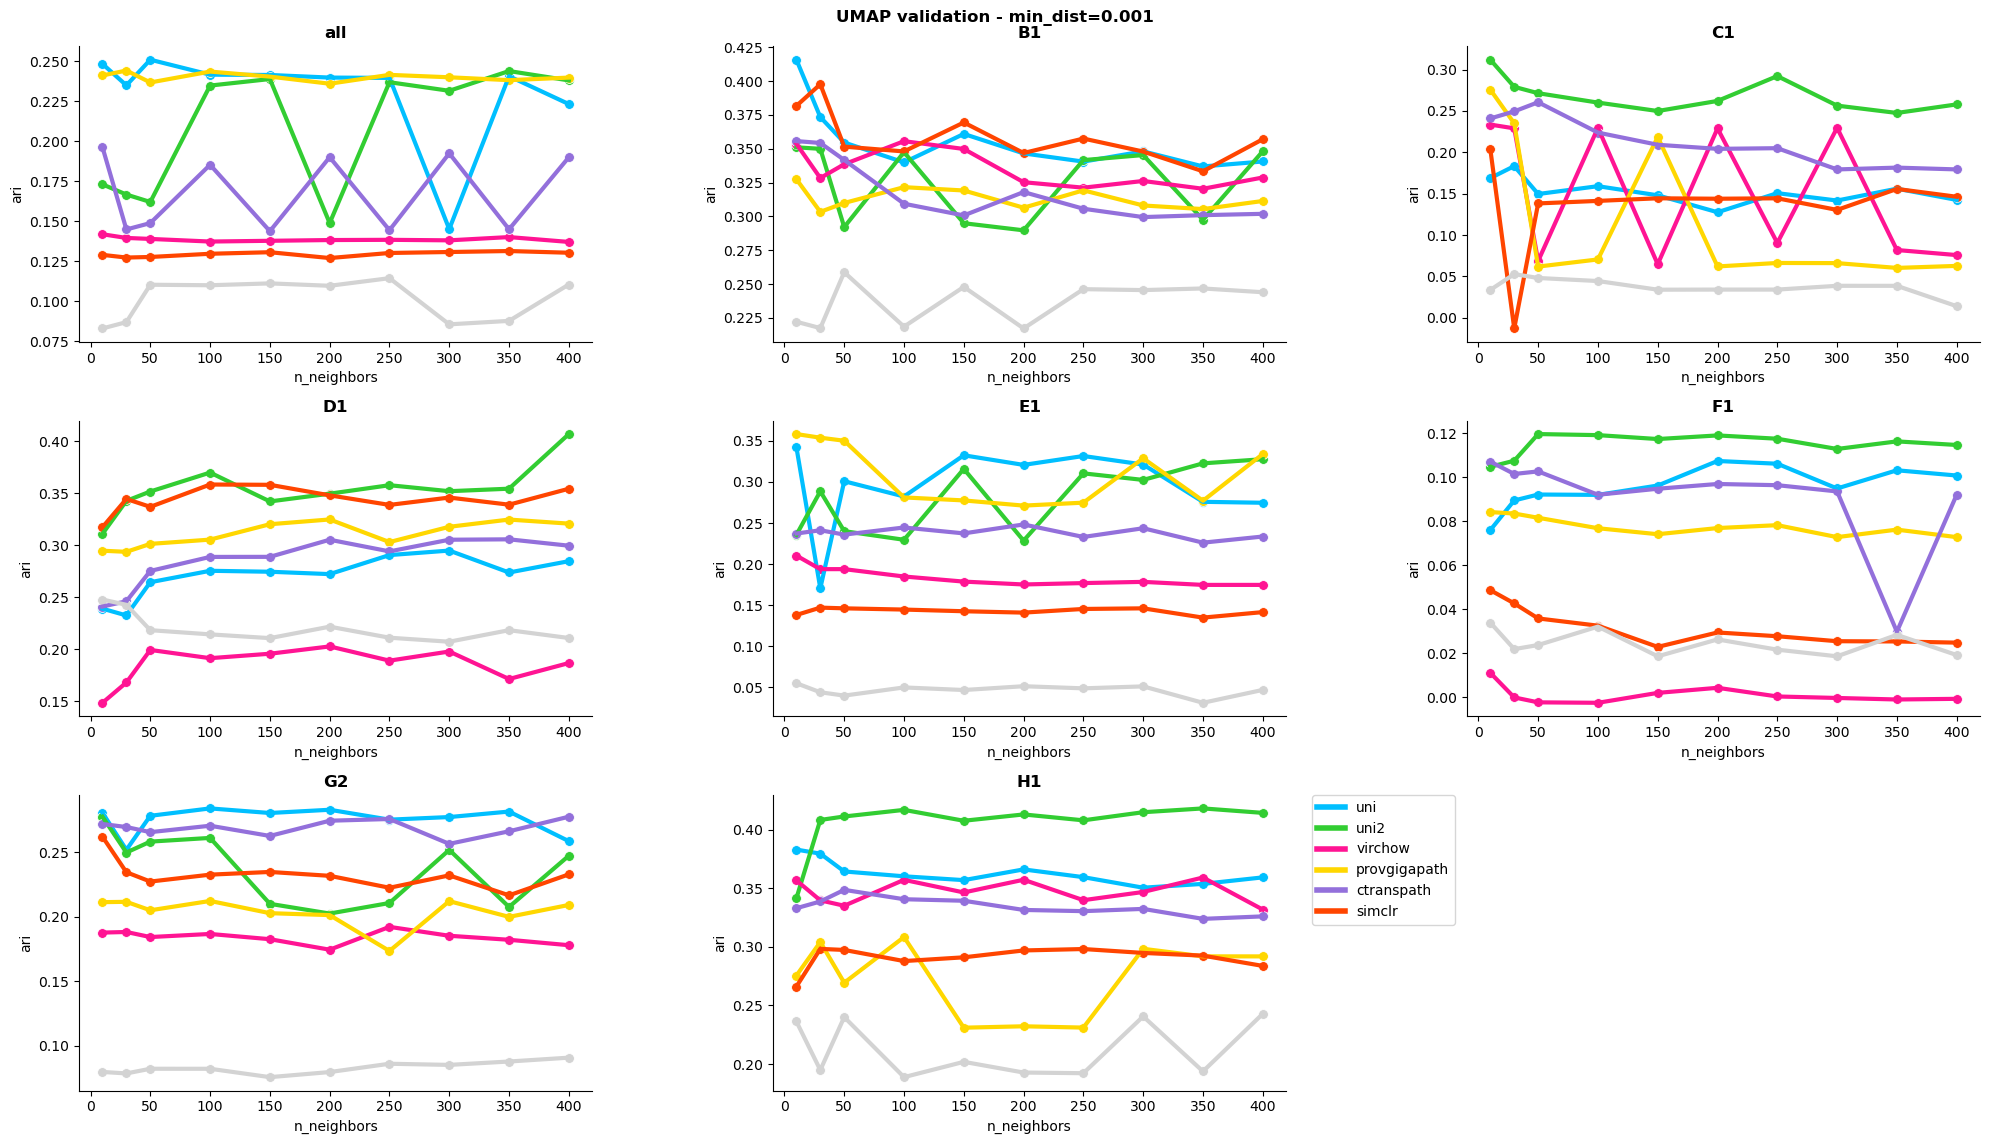

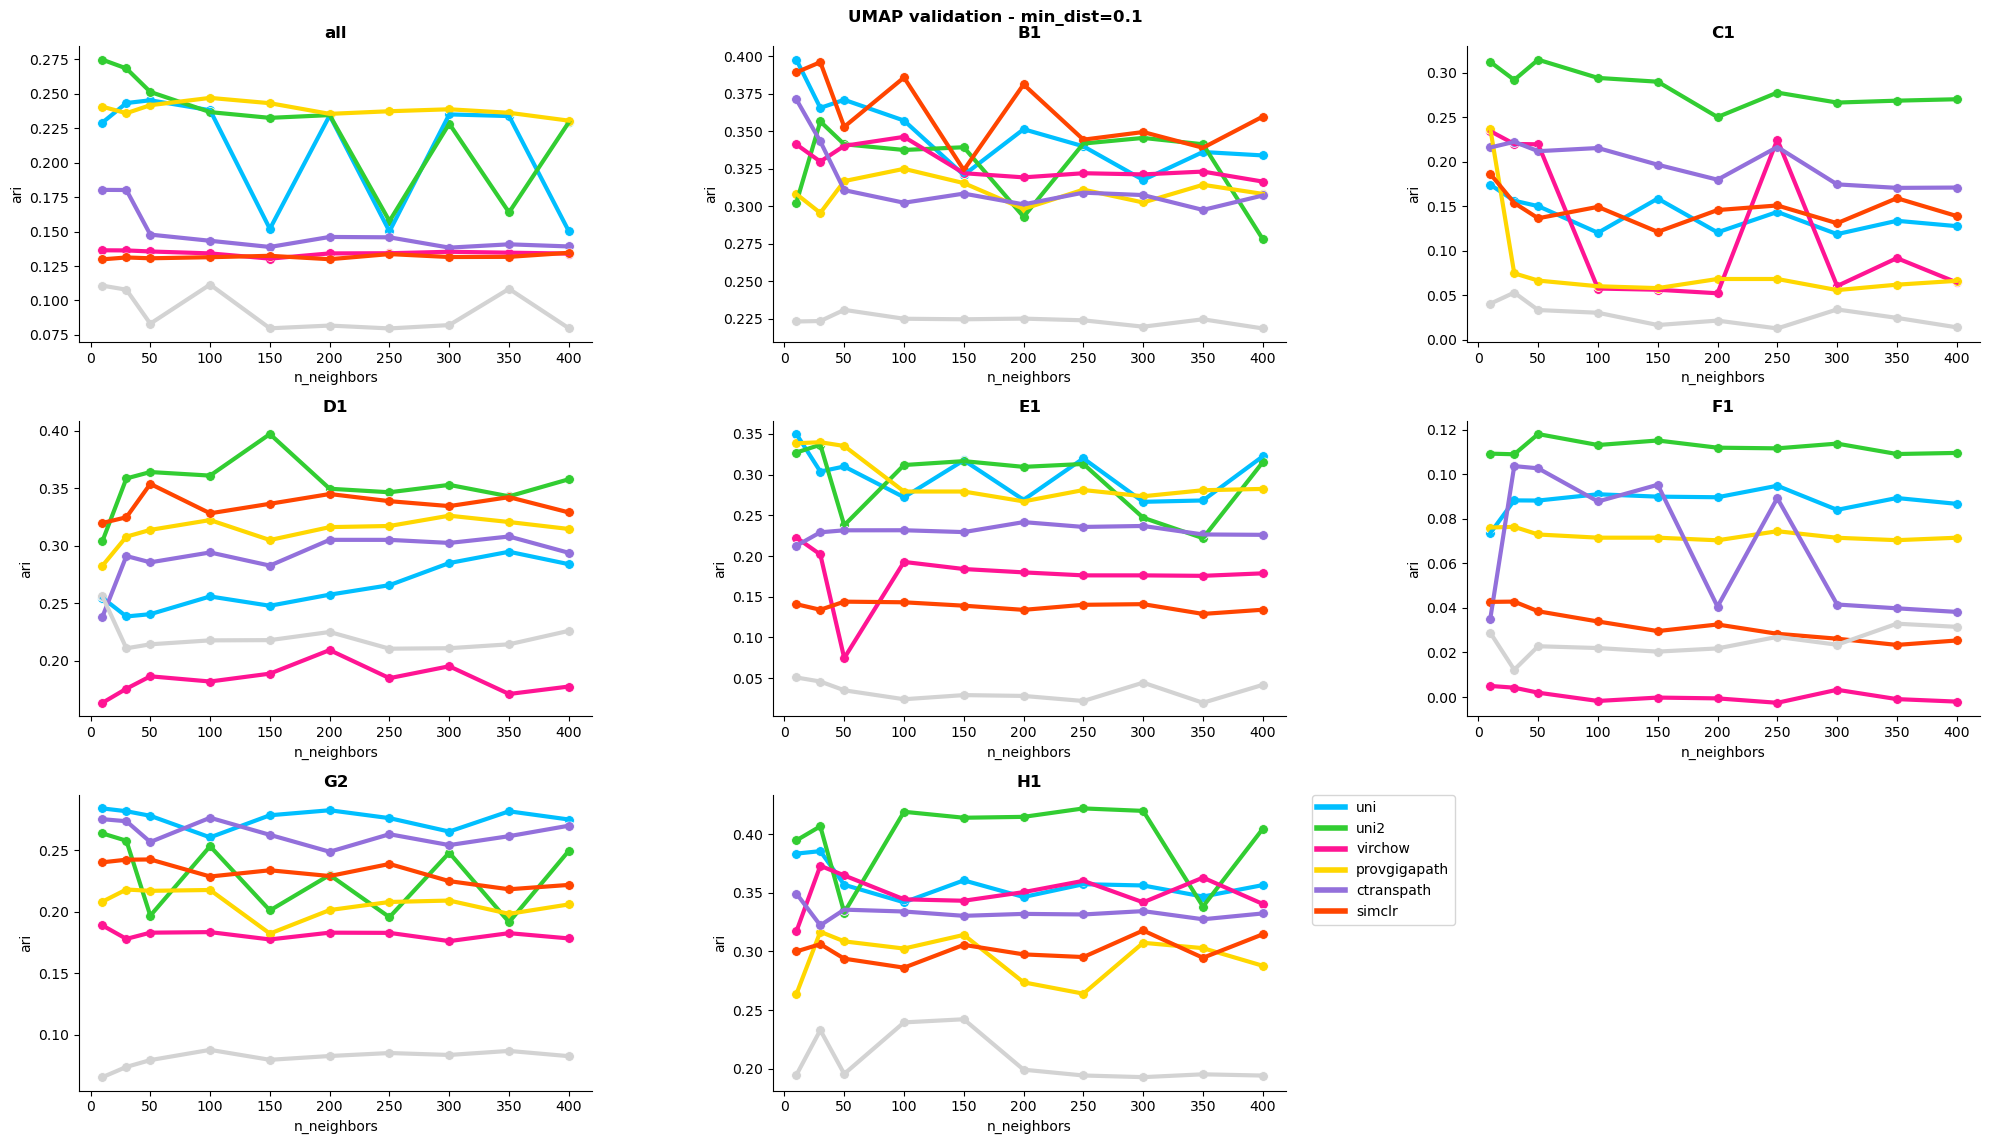

In [81]:
## UMAP validation parameters

for dist in [0.001, 0.1]:
    plt.figure(figsize=(20, 15))
    for i, type in enumerate(["all", "B1", "C1", "D1", "E1", "F1", "G2", "H1"]):
        plt.subplot(4, 3, i+1)
        
        filenames = []
        for model in base_model_palette.keys():
            if (model != 'scMTOP') & (model != 'handcrafted'):
                filename = os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', f"UMAP_validation_{model}_{type}.csv")
                filenames.append(filename)

                df_ = pd.read_csv(filename, index_col=0)
                
                sns.scatterplot(x=df_[df_['min_dist'] == dist]['n_neighbors'], 
                                y=df_[df_['min_dist'] == dist]['ari'], 
                                label=f"{model} - {type}",  
                                s=50, 
                                color=base_model_palette[model], legend=False)
                
                sns.lineplot(x=df_[df_['min_dist'] == dist]['n_neighbors'], y=df_[df_['min_dist'] == dist]['ari'], 
                             label=f"{model} - {type}", 
                             color=base_model_palette[model],
                             linewidth=3, legend=False)

                plt.legend().remove()
            plt.title(type, weight='bold')
        
    handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
    plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        
    sns.despine()
    plt.suptitle(f"UMAP validation - min_dist={dist}", weight='bold')
    plt.tight_layout()
        
    plt.savefig(os.path.join(config['figures_folder'], "Figure2/UMAP_parameters_validation_mindist_{dist}.pdf"), bbox_inches='tight')

## Correlation with the number of parameters

In [82]:

parameters = {'provgigapath': 1135, 'uni2': 681, 'virchow': 632, 'uni': 303, 'ctranspath': 28, 'simclr': 24}

embedding_size = {'provgigapath': 1536, 'uni2': 1536, 'virchow': 1280, 'uni': 1024, 'ctranspath': 768, 'simclr': 512}


In [83]:
df_shannon

df_parameters = pd.DataFrame.from_dict(parameters, orient='index', columns=['n_parameters'])
df_parameters = df_parameters.merge(df_shannon, left_index=True, right_index=True)

df_embedding_size = pd.DataFrame.from_dict(embedding_size, orient='index', columns=['embedding_size'])
df_embedding_size = df_embedding_size.merge(df_shannon, left_index=True, right_index=True)

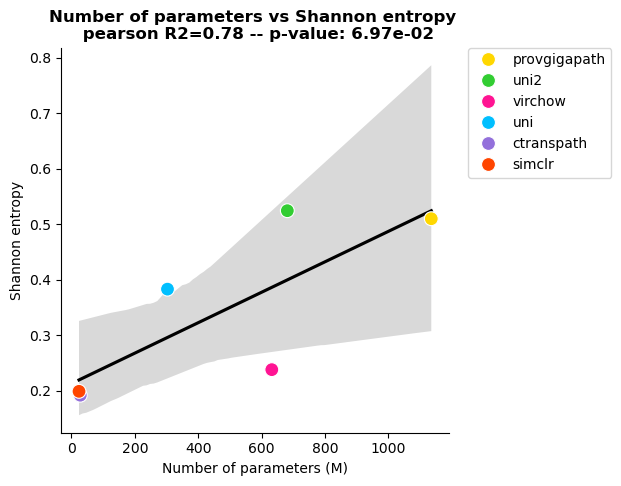

In [84]:
# compute pearson correlation

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='shannon_entropy', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='shannon_entropy', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_shannon_entropy.pdf"), bbox_inches='tight')

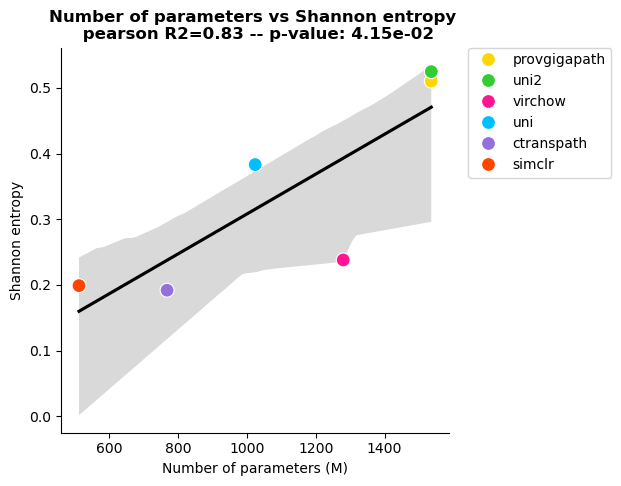

In [85]:
# compute pearson correlation

s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='shannon_entropy', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='shannon_entropy', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_shannon_entropy.pdf"), bbox_inches='tight')

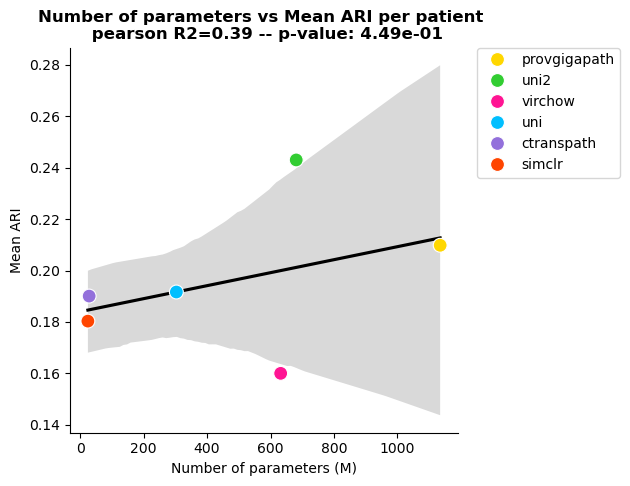

In [86]:
df_parameters = df_parameters.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='mean_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='mean_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Mean ARI')
plt.title(f"Number of parameters vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_mean_ari.pdf"), bbox_inches='tight')

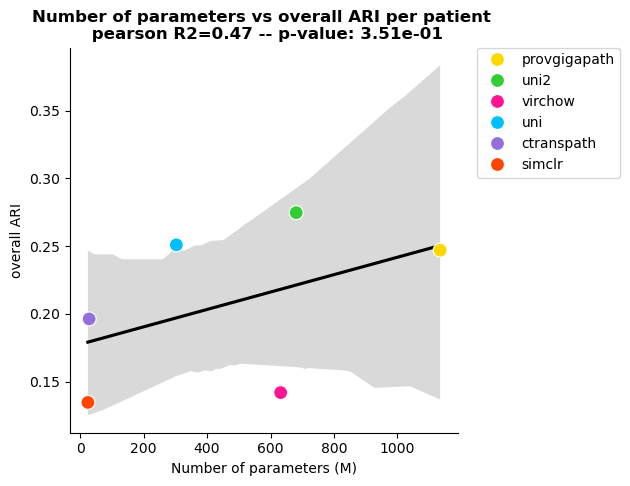

In [87]:
df_parameters = df_parameters.merge(df_model_summary[['overall_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='overall_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='overall_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('overall ARI')
plt.title(f"Number of parameters vs overall ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_overall_ari.pdf"), bbox_inches='tight')

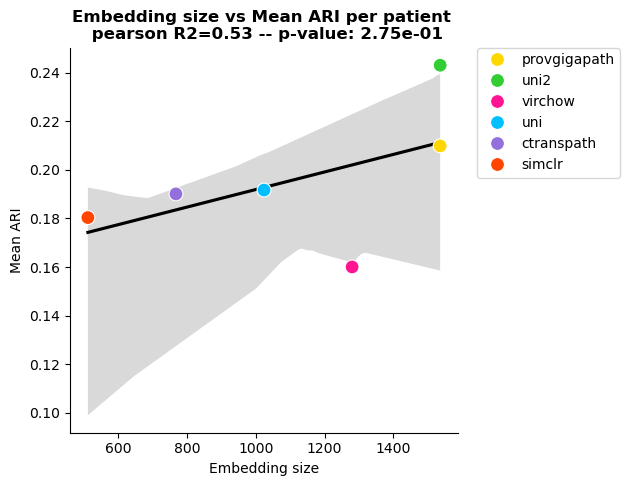

In [88]:
df_embedding_size = df_embedding_size.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='mean_ari', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='mean_ari', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Embedding size')
plt.ylabel('Mean ARI')
plt.title(f"Embedding size vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_mean_ari.pdf"), bbox_inches='tight')